<a href="https://colab.research.google.com/github/Harsh1091/Attendence-System/blob/main/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

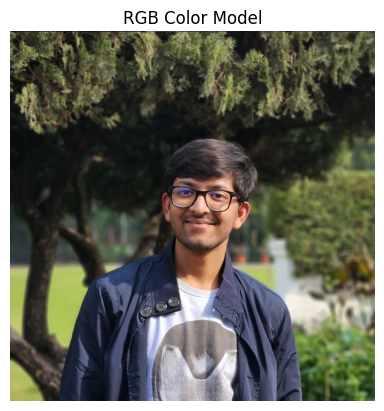

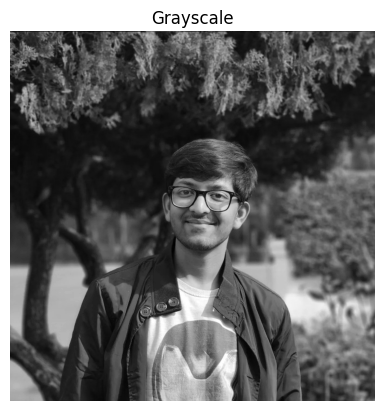

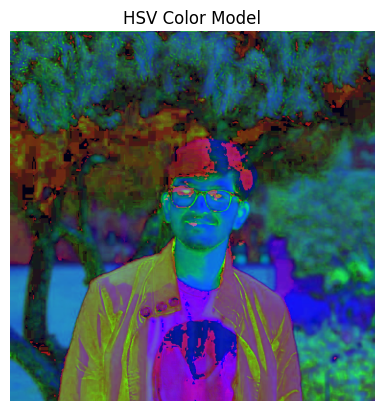

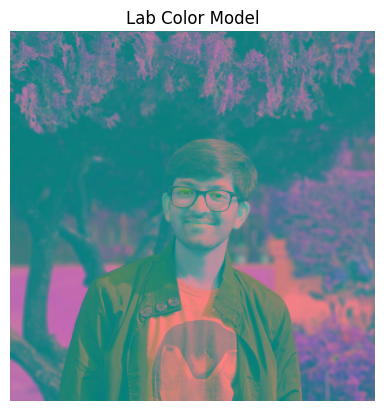

Processed images saved successfully.


In [5]:
#Experiment-1.1
#AIM: Display images in various formats using different color models.
import cv2
from matplotlib import pyplot as plt

def display_image(image, title, color_map=None):
    plt.imshow(image, cmap=color_map)
    plt.title(title)
    plt.axis('off')
    plt.show()

image_path = '/content/HarshMittal.jpg'
image = cv2.imread(image_path)

if image is None:
    print("Error: Could not read the image.")
else:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    display_image(image_rgb, 'RGB Color Model')

    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    display_image(image_gray, 'Grayscale', color_map='gray')

    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    display_image(image_hsv, 'HSV Color Model')

    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
    display_image(image_lab, 'Lab Color Model')

    cv2.imwrite('image_rgb.jpg', cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))
    cv2.imwrite('image_gray.jpg', image_gray)
    cv2.imwrite('image_hsv.jpg', cv2.cvtColor(image_hsv, cv2.COLOR_HSV2BGR))
    cv2.imwrite('image_lab.jpg', cv2.cvtColor(image_lab, cv2.COLOR_Lab2BGR))

    print("Processed images saved successfully.")


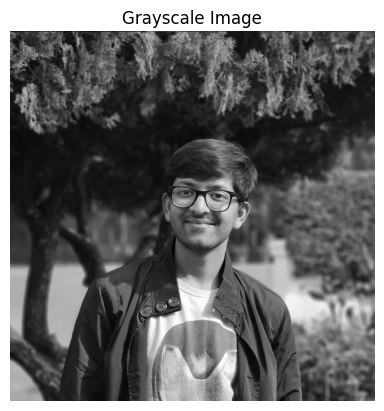

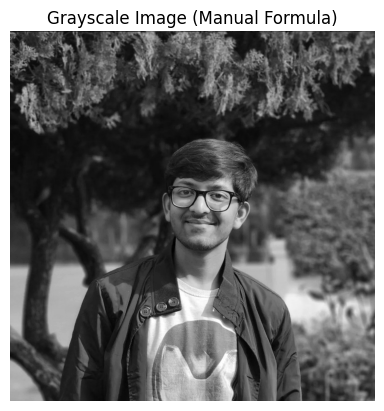

Grayscale image saved successfully.


In [7]:
#Experiment-1.2
#AIM- Convert color images into monochrome images and demonstrate image color conversion techniques.
import cv2
from matplotlib import pyplot as plt

def display_image(image, title, color_map=None):
    plt.imshow(image, cmap=color_map)
    plt.title(title)
    plt.axis('off')
    plt.show()

image_path = '/content/HarshMittal.jpg'
color_image = cv2.imread(image_path)

if color_image is None:
    print("Error: Could not load the image.")
else:
    grayscale_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
    display_image(grayscale_image, 'Grayscale Image', color_map='gray')

    b, g, r = cv2.split(color_image)

    manual_grayscale = (0.299 * r + 0.587 * g + 0.114 * b).astype("uint8")
    display_image(manual_grayscale, 'Grayscale Image (Manual Formula)', color_map='gray')

    cv2.imwrite('grayscale_image.jpg', grayscale_image)
    print("Grayscale image saved successfully.")



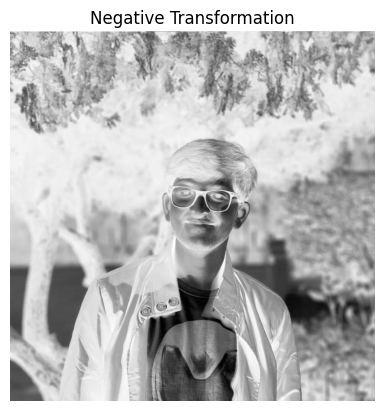

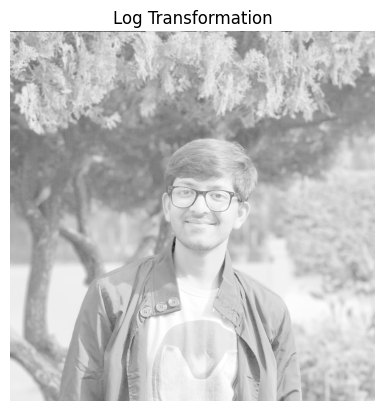

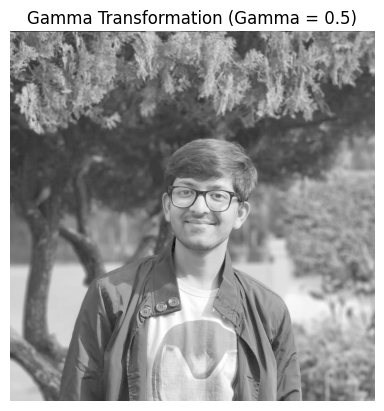

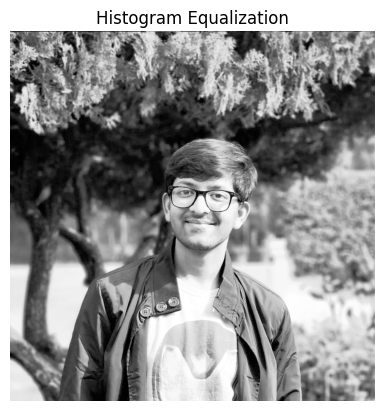

Enhanced images saved successfully.


In [9]:
#CV-1.3
#Apply image enhancement techniques using grey level transformations.
import cv2
import numpy as np
from matplotlib import pyplot as plt

def display_image(image, title, color_map='gray'):
    plt.imshow(image, cmap=color_map)
    plt.title(title)
    plt.axis('off')
    plt.show()

image_path = '/content/HarshMittal.jpg'
grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if grayscale_image is None:
    print("Error: Could not load the image.")
else:
    negative_image = 255 - grayscale_image
    display_image(negative_image, 'Negative Transformation')

    c = 255 / np.log(1 + np.max(grayscale_image))
    log_transformed = c * np.log(1 + grayscale_image.astype(np.float64))
    log_transformed = np.array(log_transformed, dtype=np.uint8)
    display_image(log_transformed, 'Log Transformation')

    gamma = 0.5
    gamma_corrected = np.array(255 * (grayscale_image / 255) ** gamma, dtype=np.uint8)
    display_image(gamma_corrected, f'Gamma Transformation (Gamma = {gamma})')

    hist_equalized = cv2.equalizeHist(grayscale_image)
    display_image(hist_equalized, 'Histogram Equalization')

    cv2.imwrite('negative_image.jpg', negative_image)
    cv2.imwrite('log_transformed.jpg', log_transformed)
    cv2.imwrite('gamma_corrected.jpg', gamma_corrected)
    cv2.imwrite('hist_equalized.jpg', hist_equalized)
    print("Enhanced images saved successfully.")




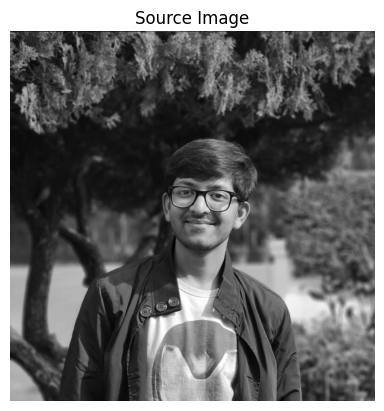

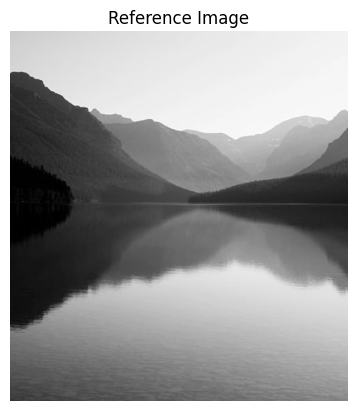

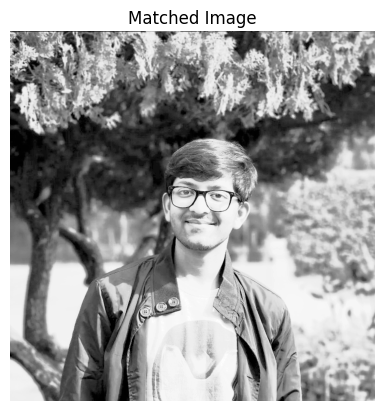

Matched image saved successfully.


In [11]:
#Experiment no-1.4
#AIM: Perform histogram matching and specification on images.
import cv2
import numpy as np
from matplotlib import pyplot as plt

def display_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def compute_cdf(hist):
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf[-1]
    return cdf_normalized
source_image_path = '/content/HarshMittal.jpg'
reference_image_path = '/content/Ref_img.png'
source_image = cv2.imread(source_image_path, cv2.IMREAD_GRAYSCALE)
reference_image = cv2.imread(reference_image_path, cv2.IMREAD_GRAYSCALE)

if source_image is None or reference_image is None:
    print("Error: Could not load one or both images.")
else:
    source_hist, _ = np.histogram(source_image.flatten(), 256, [0, 256])
    reference_hist, _ = np.histogram(reference_image.flatten(), 256, [0, 256])

    source_cdf = compute_cdf(source_hist)
    reference_cdf = compute_cdf(reference_hist)

    mapping = np.zeros(256, dtype=np.uint8)
    ref_idx = 0
    for src_idx in range(256):
        while ref_idx < 256 and reference_cdf[ref_idx] < source_cdf[src_idx]:
            ref_idx += 1
        mapping[src_idx] = ref_idx if ref_idx < 256 else 255

    matched_image = cv2.LUT(source_image, mapping)

    display_image(source_image, 'Source Image')
    display_image(reference_image, 'Reference Image')
    display_image(matched_image, 'Matched Image')

    cv2.imwrite('matched_image.jpg', matched_image)
    print("Matched image saved successfully.")


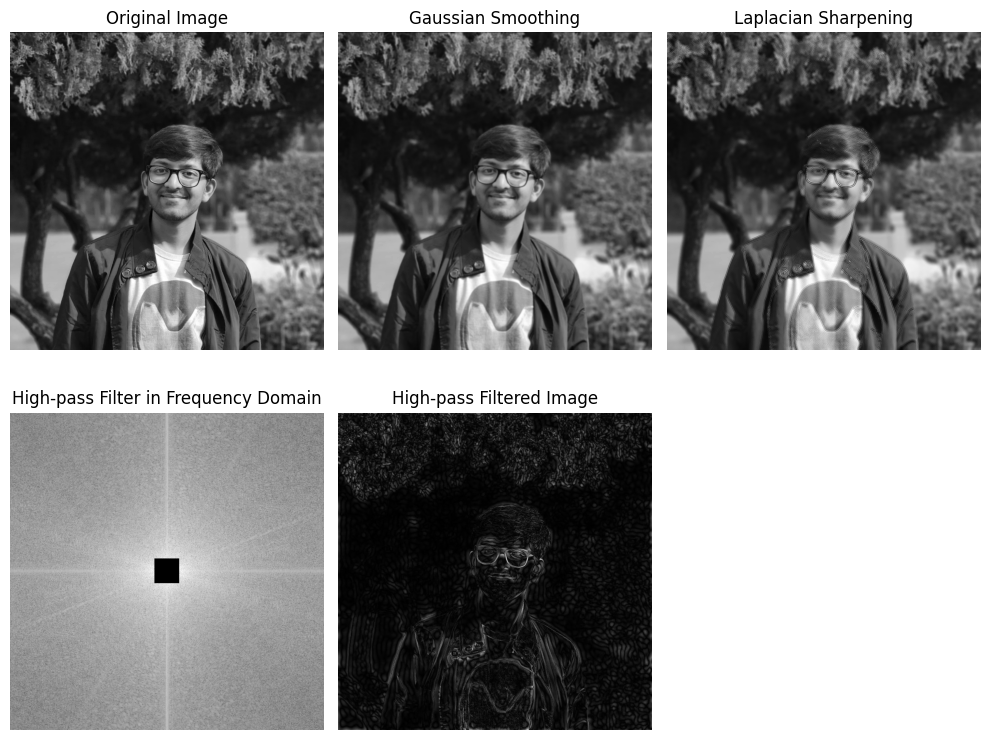

In [13]:
# EXPERIMENT NO 2.1
# AIM: Enhance images using spatial and frequency domain filters.
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/HarshMittal.jpg', cv2.IMREAD_GRAYSCALE)

smoothed_image = cv2.GaussianBlur(image, (5, 5), 0)

laplacian = cv2.Laplacian(image, cv2.CV_64F)
sharpened_image = cv2.convertScaleAbs(laplacian + image)

f_transform = np.fft.fft2(image)
f_shifted = np.fft.fftshift(f_transform)

rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
mask = np.ones((rows, cols), np.uint8)
r = 30
mask[crow - r:crow + r, ccol - r:ccol + r] = 0

f_shifted = f_shifted * mask

f_ishift = np.fft.ifftshift(f_shifted)
filtered_image = np.fft.ifft2(f_ishift)
filtered_image = np.abs(filtered_image)

plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')

plt.subplot(2, 3, 2), plt.imshow(smoothed_image, cmap='gray')
plt.title('Gaussian Smoothing'), plt.axis('off')

plt.subplot(2, 3, 3), plt.imshow(sharpened_image, cmap='gray')
plt.title('Laplacian Sharpening'), plt.axis('off')

plt.subplot(2, 3, 4), plt.imshow(np.log(1 + np.abs(f_shifted)), cmap='gray')
plt.title('High-pass Filter in Frequency Domain'), plt.axis('off')

plt.subplot(2, 3, 5), plt.imshow(filtered_image, cmap='gray')
plt.title('High-pass Filtered Image'), plt.axis('off')

plt.tight_layout()
plt.show()



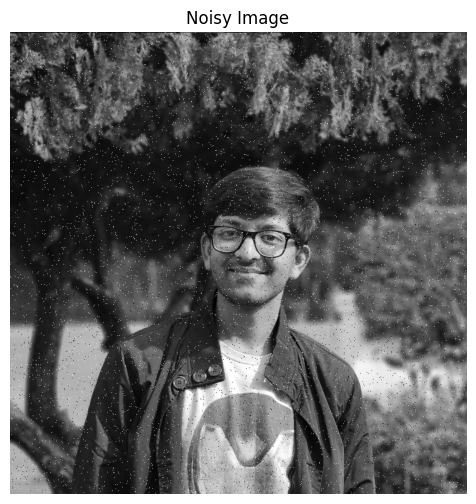

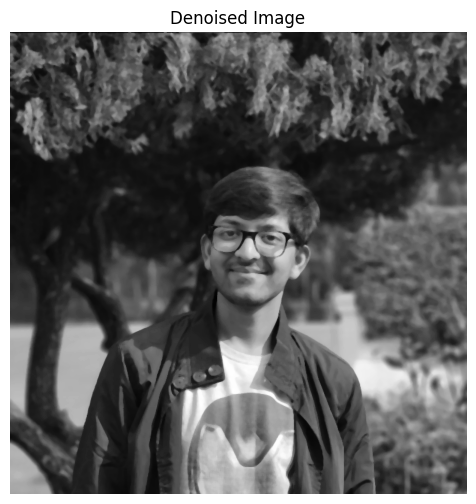

Error: Could not read the degraded image.
Experiment completed successfully.


In [14]:
# EXPERIMENT NO-2.2
# AIM: Remove noise from images and apply inverse filtering
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images using Matplotlib
def display_image(image, title, color_map='gray'):
    plt.figure(figsize=(8, 6))
    plt.imshow(image, cmap=color_map)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Part 1: Noise Removal using Median Filtering
# Load the input image (add noise manually for testing purposes)
input_image_path = '/content/HarshMittal.jpg'  # Replace with your image path
image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Could not read the image.")
else:
    # Simulate noise (e.g., salt-and-pepper noise)
    noisy_image = image.copy()
    salt_pepper_prob = 0.02  # Probability of noise occurrence
    num_salt = np.ceil(salt_pepper_prob * image.size * 0.5)
    num_pepper = np.ceil(salt_pepper_prob * image.size * 0.5)

    # Apply salt noise
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 255

    # Apply pepper noise
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0

    # Display noisy image
    display_image(noisy_image, 'Noisy Image')

    # Apply median filter for noise removal
    denoised_image = cv2.medianBlur(noisy_image, 5)

    # Display denoised image
    display_image(denoised_image, 'Denoised Image')

    # Save the denoised image
    cv2.imwrite('denoised_image.jpg', denoised_image)

# Part 2: Inverse Filtering for Image Restoration
# Load the degraded image (e.g., blurred image)
degraded_image_path = '/content/degraded_image.jpg'  # Replace with your image path
degraded_image = cv2.imread(degraded_image_path, cv2.IMREAD_GRAYSCALE)

if degraded_image is None:
    print("Error: Could not read the degraded image.")
else:
    # Display the degraded image
    display_image(degraded_image, 'Degraded Image')

    # Apply Fourier transform to the degraded image
    degraded_fft = np.fft.fft2(degraded_image)
    degraded_fft_shifted = np.fft.fftshift(degraded_fft)

    # Create a simple degradation function (e.g., Gaussian blur in frequency domain)
    rows, cols = degraded_image.shape
    crow, ccol = rows // 2, cols // 2
    sigma = 10
    x = np.arange(-ccol, ccol)
    y = np.arange(-crow, crow)
    X, Y = np.meshgrid(x, y)
    gaussian_filter = np.exp(-0.5 * (X**2 + Y**2) / sigma**2)
    gaussian_filter = np.fft.ifftshift(gaussian_filter)

    # Apply inverse filtering (assume minimal noise)
    eps = 1e-3  # Regularization to avoid division by zero
    inverse_filter = 1 / (gaussian_filter + eps)
    restored_fft = degraded_fft_shifted * inverse_filter

    # Inverse Fourier transform to get the restored image
    restored_image = np.fft.ifft2(np.fft.ifftshift(restored_fft))
    restored_image = np.abs(restored_image)

    # Normalize and display the restored image
    restored_image = cv2.normalize(restored_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    display_image(restored_image, 'Restored Image')

    # Save the restored image
    cv2.imwrite('restored_image.jpg', restored_image)

print("Experiment completed successfully.")


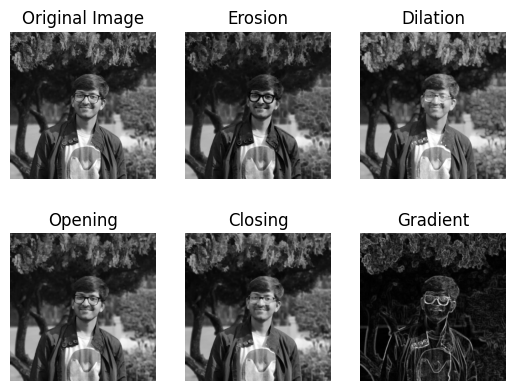

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('HarshMittal.jpg', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(image, kernel, iterations=1)
cv2.imwrite('erosion.jpg', erosion)
dilation = cv2.dilate(image, kernel, iterations=1)
cv2.imwrite('dilation.jpg', dilation)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
cv2.imwrite('opening.jpg', opening)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
cv2.imwrite('closing.jpg', closing)
gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)
cv2.imwrite('gradient.jpg', gradient)
titles = ['Original Image', 'Erosion', 'Dilation', 'Opening', 'Closing', 'Gradient']
images = [image, erosion, dilation, opening, closing, gradient]
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

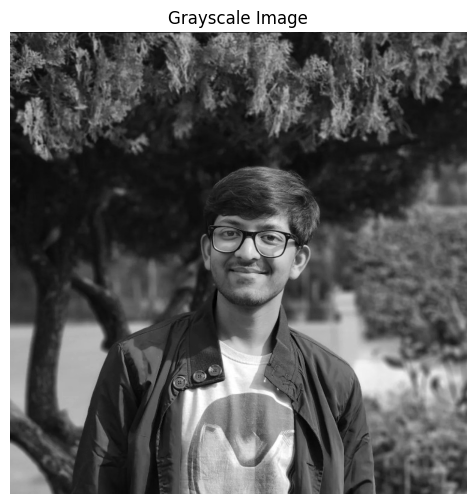

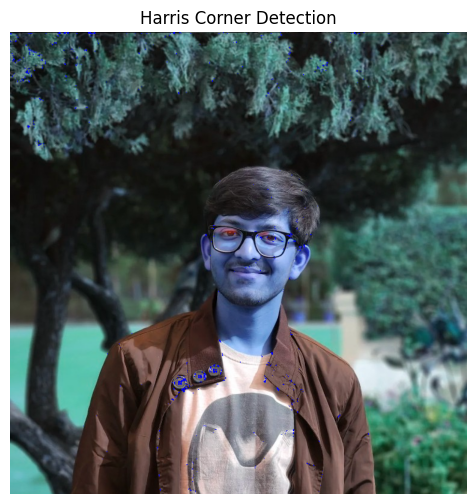

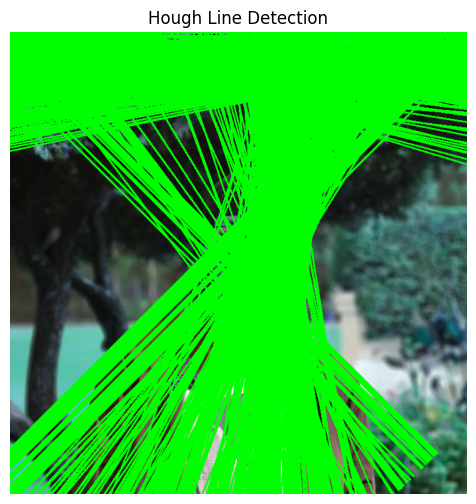

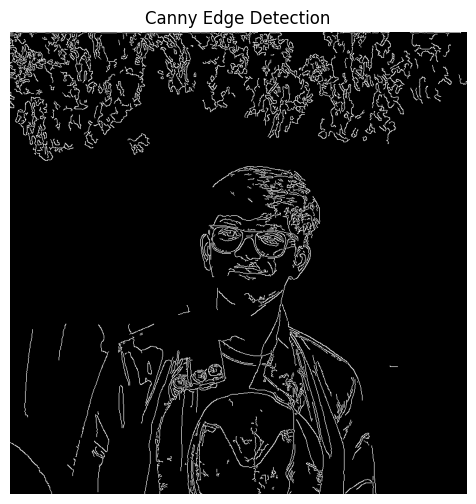

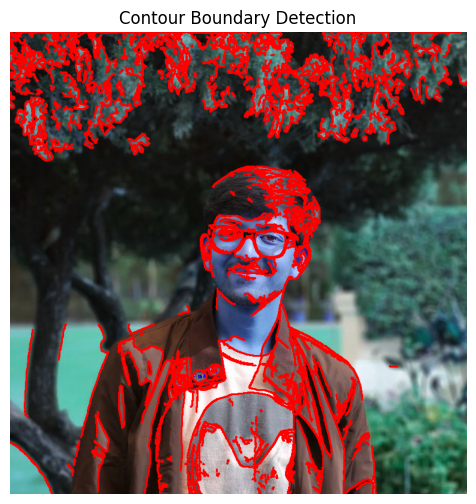

Experiment completed successfully.


In [16]:
# EXPERIMENT NO-3.1
# AIM: Detect points, lines, edges, and boundaries in images

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images using Matplotlib
def display_image(image, title, color_map='gray'):
    plt.figure(figsize=(8, 6))
    plt.imshow(image, cmap=color_map)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the input image
image_path = '/content/HarshMittal.jpg'  # Replace with your image path
image = cv2.imread(image_path)

if image is None:
    print("Error: Could not read the image.")
else:
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    display_image(gray_image, 'Grayscale Image')

    # Part 1: Point Detection using Harris Corner Detector
    gray_float = np.float32(gray_image)
    harris_response = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)

    # Enhance the corners for visualization
    image[harris_response > 0.01 * harris_response.max()] = [0, 0, 255]
    display_image(image, 'Harris Corner Detection')

    # Part 2: Line Detection using Hough Transform
    edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

    # Create a copy for drawing lines
    line_image = image.copy()
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        display_image(line_image, 'Hough Line Detection')

    # Part 3: Edge Detection using Canny Edge Detector
    edges_canny = cv2.Canny(gray_image, 100, 200)
    display_image(edges_canny, 'Canny Edge Detection')

    # Part 4: Boundary Detection using Contours
    contours, _ = cv2.findContours(edges_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_image = image.copy()
    cv2.drawContours(contour_image, contours, -1, (255, 0, 0), 2)
    display_image(contour_image, 'Contour Boundary Detection')

print("Experiment completed successfully.")


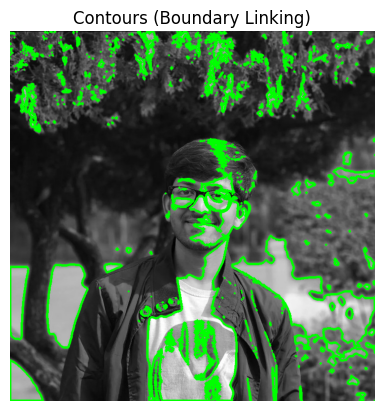

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image in grayscale
image = cv2.imread('/content/HarshMittal.jpg', 0)

# Apply thresholding to create a binary image
_, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Convert the image to color for better contour visualization
image_with_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Draw contours on the image
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 3)

# Display the image using matplotlib
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.title('Contours (Boundary Linking)')
plt.axis('off')
plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


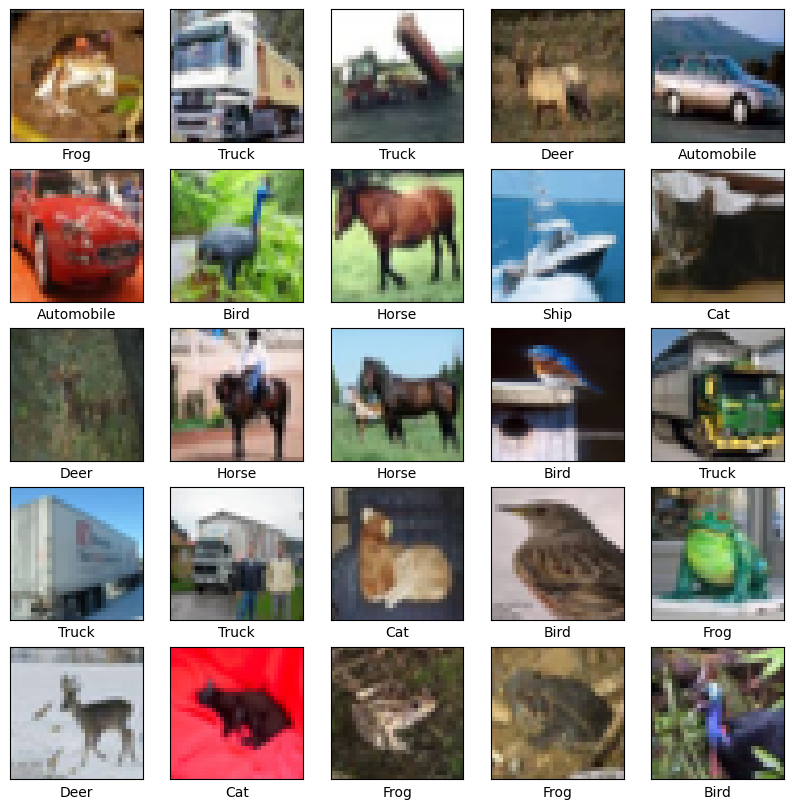

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 47ms/step - accuracy: 0.3465 - loss: 1.7444 - val_accuracy: 0.5310 - val_loss: 1.2846
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 45ms/step - accuracy: 0.5692 - loss: 1.2231 - val_accuracy: 0.6136 - val_loss: 1.0843
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.6316 - loss: 1.0383 - val_accuracy: 0.6381 - val_loss: 1.0315
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.6709 - loss: 0.9374 - val_accuracy: 0.6417 - val_loss: 1.0032
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.6965 - loss: 0.8599 - val_accuracy: 0.6781 - val_loss: 0.9254
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 46ms/step - accuracy: 0.7288 - loss: 0.7774 - val_accuracy: 0.6863 - val_loss: 0.9174
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.7459 - loss: 0.7251 - val_accuracy: 0.7024 - val_loss: 0.8849
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.7616 -

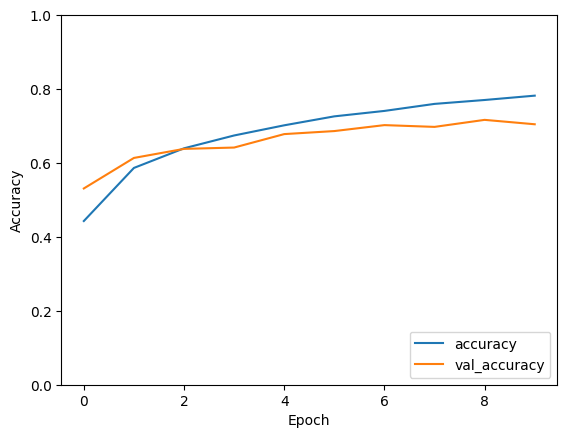

In [22]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize the images to the range 0-1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Plot the first 25 images from the training set with their labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
